## Constructing euclidian rhythms from biotunings

Euclidean rhythms represent an even distribution of pulses within a specified number of steps. It is possible to convert frequency ratios into euclidian rhythms in that a ratio's numerator can be seen as the number of pulses and a ratio's denominator as the number of steps within which the pulses should be distributed. In this notebook we will see how to derive Euclidean rhythms from EEG signal by extracting spectal peaks and looking at their frequency ratios. Therefore, more consonant brain frequency ratios will lead to more aligned Euclidean polyrhythms. 

In [2]:
import numpy as np
from biotuner.biotuner_object import compute_biotuner, harmonic_tuning
import time
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Load dataset
data = np.load('../data/EEG_example.npy')

# Select a single time series 
# 20
data_ = data[25]
start = time.time()

# Initialize biotuner object
biotuning_harm_peaks = compute_biotuner(sf = 1000, peaks_function = 'harmonic_recurrence', precision = 0.5) 

# Extract spectral peaks
biotuning_harm_peaks.peaks_extraction(data_, min_freq = 5, max_freq = 20, min_harms = 4, harm_limit = 128)
#print(biotuning_harm_peaks.all_harmonics)

stop = time.time()
print(stop-start)

# Print the extracted peaks
print('Spectral peaks :', biotuning_harm_peaks.peaks)

# Create harmonic tuning
harm_tuning = harmonic_tuning(biotuning_harm_peaks.all_harmonics)
print(harm_tuning)

Number of peaks : 4
0.01108407974243164
Spectral peaks : [ 8.  10.  15.5 17. ]
[1.125, 1.1875, 1.25, 1.3125, 1.375, 1.40625, 1.5, 1.5625, 1.75, 1.8125, 1.875, 1.90625]


### Deriving euclidian rhythms from a series of ratios

When mode = 'normal', the ratios are inverted and the numerator is taken as the number of pulses and the denominator as the number of steps (e.g. 3/2 -> 2pulses/3steps).

When mode = 'full', the ratios are inverted. The number of steps corresponds to num*denom and the numbers of pulses correspond to both the initial numerator and denominator (e.g. 3/2 -> 3pulses/6steps and 2pulses/6steps)

In [3]:
from biotuner.rhythm_construction import scale2euclid, interval_vector, euclid_string_to_referent, interval_vec_to_string
from biotuner.biotuner_utils import scale2frac
from biotuner.dictionaries import dict_rhythms

# Convert the tuning from ratios to fractions
harm_tuning_frac, _, _ = scale2frac(harm_tuning[3:10])
print('Tuning :', harm_tuning_frac)

# Derive euclidian rhythms from the harmonic tuning
euclid_patterns = scale2euclid(harm_tuning[3:10], max_denom = 16, mode = 'normal')
print('Euclid patterns :', euclid_patterns)

# Compute interval vectors
interval_vectors = [interval_vector(x) for x in euclid_patterns]
print('Interval vectors :', interval_vectors)

# Compare rhythms to referents
strings = interval_vec_to_string(interval_vectors)
euclid_referent = euclid_string_to_referent(strings, dict_rhythms)
euclid_referent

Tuning : [21/16, 11/8, 45/32, 3/2, 25/16, 7/4, 29/16]
Euclid patterns : [[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1], [1, 1, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]]
Interval vectors : [[1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1], [1, 2, 1, 1, 2, 1, 1, 2], [1, 2, 1, 2, 1], [1, 2], [2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1], [2, 2, 2, 1], [2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2]]


['None',
 'None',
 'It is the Nawakhat pattern, a popular Arabic rhythm. In Nubia it is called the Al Noht rhythm.',
 'A common Afro-Cuban drum pattern when started on the second onset as in [101]. For example, it is the conga rhythm of the (6/8)-time Swing Tumbao. It is common in Latin American music, as for example in the Cueca, and the coros de clave. It is common in Arabic music, as for example in the Al Taer rhythm of Nubia. It is also a rhythmic pattern of the Drum Dance of the Slavey Indians of Northern Canada',
 'None',
 'It is a Ruchenitza Bulgarian folk-dance rhythm.',
 'None']

### Finding consonant euclidian rhythms from a set of frequency ratios
'consonant_euclid' function derives euclidian rhythm from a set of consonant intervals. 

First, a set of denominators is defined by finding the common denominator of each pair of ratios (e.g. 3/5 and 4/7 give 5*7=35). 

The consonance is computed on each pairs of denominators to find harmonic subdivisions. Only the euclidian rhythms from consonant denominators (steps) are returned.

The extracted rhythms are compared to a dictionary containing a large database of known rhythms and their origin and description.

The 

In [4]:
from biotuner.rhythm_construction import consonant_euclid, interval_vec_to_string

# Derive consonant euclidian rhythms from the harmonic tuning
euclid_final, cons = consonant_euclid(harm_tuning, n_steps_down = 2, limit_denom = 8, 
                                      limit_cons = 0.5, limit_denom_final = 8)
print('Euclid patterns :', euclid_final)

# Compare rhythms to referents
interval_vectors = [interval_vector(x) for x in euclid_final]
strings = interval_vec_to_string(interval_vectors)
euclid_referent = euclid_string_to_referent(strings, dict_rhythms)
euclid_referent

c:\Users\User\anaconda3\envs\biotuner\lib\fractions.py:612: RuntimeWarning: overflow encountered in longlong_scalars
  self._denominator * other.numerator)


Euclid patterns : [[1, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 0]]


c:\Users\User\anaconda3\envs\biotuner\lib\fractions.py:611: RuntimeWarning: overflow encountered in longlong_scalars
  return op(self._numerator * other.denominator,


['None',
 'None',
 'None',
 "A rhythm found in Greece, Namibia, Rwanda and Central Africa. It is also a 13th century Persian rhythm called Khafif-e-ramal, as well as the rhythm of the dance Makedonka from the FYROM. Tchaikovsky used it as the metric pattern in the second movement of his Symphony No. 6. Started on the second onset as in [10010] it is a rhythm found in Central Africa, Bulgaria, Turkey, Turkestan and Norway. It is also the metric pattern of Dave Brubeck's Take Five, as well as Mars from The Planets by Gustav Holst. Rotated as in [10010100100], it is a Serbian rhythmic pattern. When it is started on the fourth (last) onset it is the Daasa al kbiri rhythmic pattern of Yemen.",
 'None',
 "It is the Ruchenitza rhythm used in a Bulgarian folk-dance. It is also the metric pattern of Pink Floyd's Money.",
 'It is a Ruchenitza Bulgarian folk-dance rhythm.',
 'It is the Nawakhat pattern, a popular Arabic rhythm. In Nubia it is called the Al Noht rhythm.',
 'None']

### Visualizing euclidean biorhythms

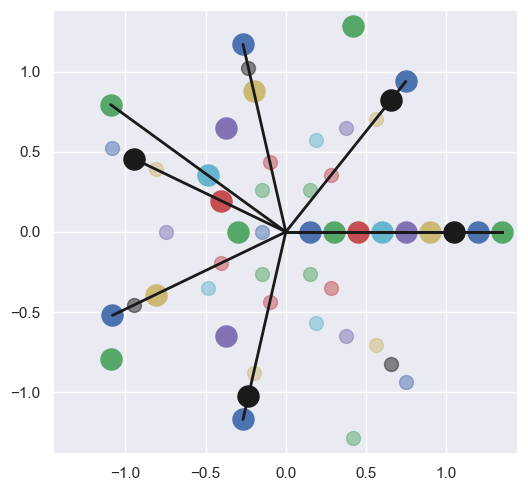

In [5]:
# variability of scales of integration for optimal brain homeostatic growth
from biotuner.vizs import visualize_rhythms, find_optimal_offsets

euclid_rhythms = []
for i in range(len(euclid_final)):
    pulse = euclid_final[i].count(1)
    steps = len(euclid_final[i])
    euclid_rhythms.append((pulse, steps))
visualize_rhythms(euclid_rhythms)


### Optimizing rhythms offset to increase pulse alignments.

##### Simple use case

Optimal offset values [3, 4, 4]
NOT OPTIMIZED


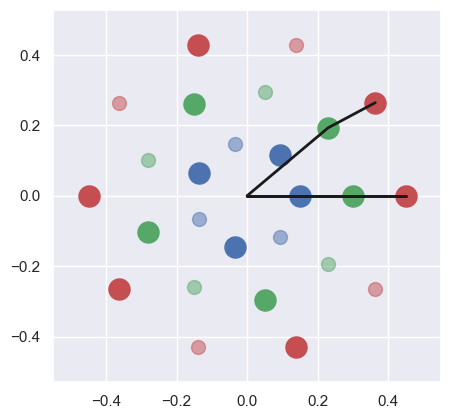

OPTIMIZED


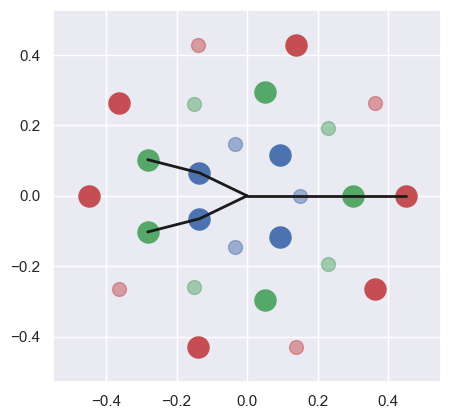

In [7]:
pulses_steps = [(3,8), (5,8), (7,8)]
pulses_steps = [(4,7), (5,9), (6,10)]
offsets = find_optimal_offsets(pulses_steps)
print('Optimal offset values', offsets)
print('NOT OPTIMIZED')
visualize_rhythms(pulses_steps, offsets=None, plot_size=5, 
                  tolerance=0.1)
print('OPTIMIZED')
visualize_rhythms(pulses_steps, offsets, plot_size=5, 
                  tolerance=0.1)

#### Biotuning use case

[(1, 2), (2, 6), (2, 7), (2, 5), (3, 6), (3, 7), (4, 7), (5, 7), (4, 5)]
Optimal offset values [0, 0, 1, 1, 0, 1, 3, 2, 1]
NOT OPTIMIZED


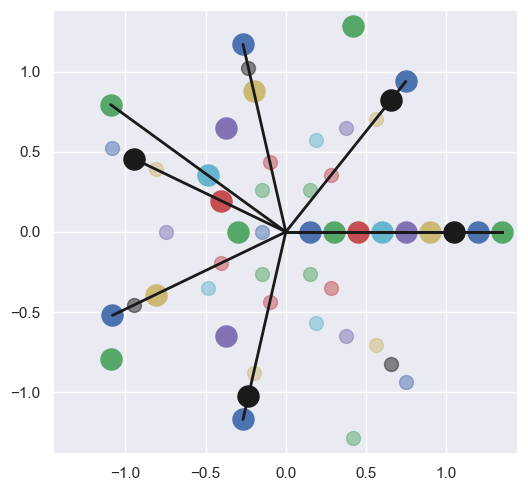

OPTIMIZED


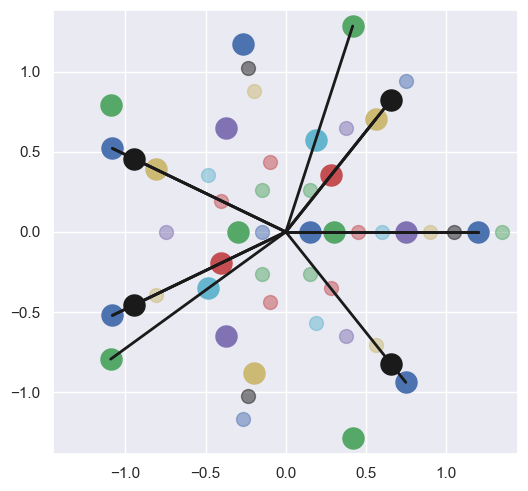

In [8]:
offsets = find_optimal_offsets(euclid_rhythms)
print(euclid_rhythms)
print('Optimal offset values', offsets)
print('NOT OPTIMIZED')
visualize_rhythms(euclid_rhythms, offsets=None, tolerance=0.1)
print('OPTIMIZED')
visualize_rhythms(euclid_rhythms, offsets, tolerance=0.1)

